In [1]:
import sys
sys.path.insert(1, '../../..')

In [2]:
import numpy as np
import pandas as pd
from medicine.models.compound import Compound
from medicine.models.medicine import Medicine
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
compound_list = []
for compound in Compound.query.all():
    medicine_list = [medicine.name for medicine in compound.medicine]
    compound_list.append(medicine_list)

F:\Python\anaconda3\lib\site-packages\sqlalchemy\engine\default.py:470: Warning: (1366, "Incorrect string value: '\\xA5x\\xA5_\\xBC\\xD0...' for column 'VARIABLE_VALUE' at row 480")
  cursor.execute(statement, parameters)


In [4]:
df = pd.DataFrame({'medicines':compound_list}, index=[c.name for c in Compound.query.all()])
df.head(10)

,medicines
滅瘢痕,[夏冰]
闢禳時疫,[半天河]
身體白駁,[半天河]
目不得瞑,"[流水, 半夏]"
汗後奔豚,"[流水, 甘草, 茯苓]"
服藥過劑煩悶,[流水]
九竅出血,[井華水]
衄血不止,[井華水]
衄血不止,[井華水]
衄血不止,[井華水]


In [5]:
te = TransactionEncoder()
te_ary = te.fit(compound_list).transform(compound_list)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head(10)

,丁香,三七,不灰木,丹參,丹砂,丹黍米,乳汁,乳腐,乾薑,亂發,...,鼠李,鼬鼠,齑水,齒,龍珠,龍眼,龍腦香,龍膽,龍舌草,龍葵
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt

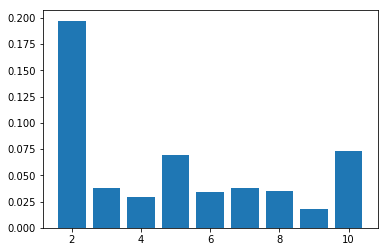

[0.19729323298897575, 0.03831047098508301, 0.029491482796104588, 0.06891923764313222, 0.033708068342394835, 0.03798889290802541, 0.03523951852735771, 0.017544695355399154, 0.0729954410395101]


In [7]:
silhouette_avgs = []
ks = range(2,11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(df)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(df, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [8]:
compound_names = [c.name for c in Compound.query.all()]
id_compound_dict = dict(zip(df.index, compound_names))
[(k, id_compound_dict[k]) for k in list(id_compound_dict.keys())[0:5]]

[(0, '滅瘢痕'), (1, '闢禳時疫'), (2, '身體白駁'), (3, '目不得瞑'), (4, '汗後奔豚')]

In [9]:
n_clusters = 3
kmeans_fit = cluster.KMeans(n_clusters = n_clusters).fit(df)

In [10]:
group = 2
ids = np.where(kmeans_fit.labels_ == group)[0]
names = [id_compound_dict[i] for i in ids]
items = [list(df.columns[df.loc[i]]) for i in ids]
group_df = pd.DataFrame(data={'name': names, 'item': items}, columns=['name', 'item'])
group_df.head(10)

,name,item
0,耳内惡瘡,"[曾青, 雄黃, 黃芩]"
1,滾痰丸,"[人屎, 大黃, 沉香, 澤瀉, 硝石, 礞石, 黃芩]"
2,強中消渴,"[人參, 大豆, 栝蔞, 沙參, 甘草, 知母, 石膏, 磁石, 茯苓, 荠, 黃芩]"
3,熱毒赤痢,"[黃芩, 黃連]"
4,小兒疳熱,"[大黃, 胡黃連, 黃芩]"
5,三黃丸,"[大黃, 黃芩, 黃連]"
6,三補丸,"[蒸餅, 黃芩, 黃連]"
7,肺中有火,[黃芩]
8,膚熱如燎,[黃芩]
9,小兒驚啼,"[人參, 溫湯, 黃芩]"


In [11]:
group = 1
ids = np.where(kmeans_fit.labels_ == group)[0]
names = [id_compound_dict[i] for i in ids]
items = [list(df.columns[df.loc[i]]) for i in ids]
group_df = pd.DataFrame(data={'name': names, 'item': items}, columns=['name', 'item'])
group_df

,name,item
0,滅瘢痕,[夏冰]
1,闢禳時疫,[半天河]
2,身體白駁,[半天河]
3,目不得瞑,"[半夏, 流水]"
4,服藥過劑煩悶,[流水]
5,九竅出血,[井華水]
6,衄血不止,[井華水]
7,衄血不止,[井華水]
8,衄血不止,[井華水]
9,衄血不止,[井華水]
